In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
ab_data = pd.read_csv("ab_test_data.csv")
print("Sample Data :\n",ab_data.head())

Sample Data :
    user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


In [3]:
conv_old= ab_data[ab_data['group'] == 'control']['converted'].sum()
conv_new = ab_data[ab_data['group'] == 'treatment']['converted'].sum()
n_old = ab_data[ab_data['group'] == 'control'].shape[0]
n_new = ab_data[ab_data['group'] == 'treatment'].shape[0]

In [4]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value =proportions_ztest(
    [conv_new, conv_old],
    [n_new, n_old],
    alternative='larger'
)
print(f"Z-score: {z_score:.2f}, p-value: {p_value:.4f}")

Z-score: -1.24, p-value: 0.8919


In [5]:
from statsmodels.stats.proportion import proportion_confint
ci_old = proportion_confint(conv_old, n_old, alpha=0.05)
ci_new = proportion_confint(conv_new, n_new, alpha=0.05)

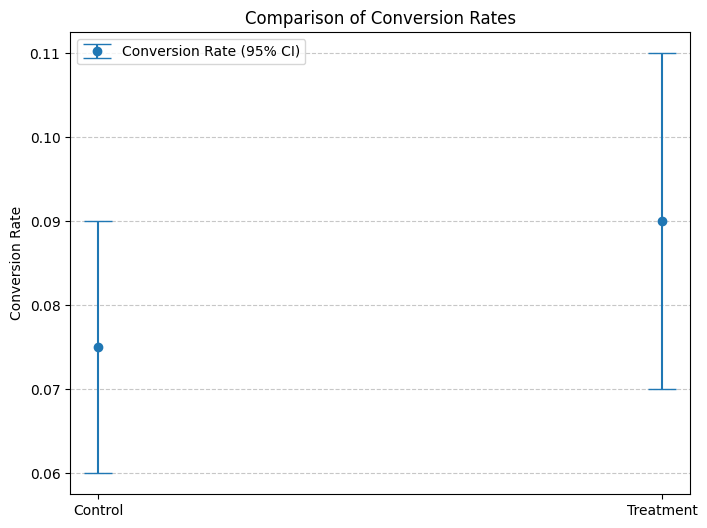

In [6]:
y_values = [0.075, 0.09]
ci_old = (0.06, 0.09)
ci_new = (0.07, 0.11)
confidence_intervals = [ci_old, ci_new]
lower_errors = [y - ci[0] for y, ci in zip(y_values, confidence_intervals)]
upper_errors = [ci[1] - y for y, ci in zip(y_values, confidence_intervals)]
asymmetric_errors = [lower_errors, upper_errors]
plt.figure(figsize=(8, 6))
plt.errorbar(x=[0, 1], y=y_values,
             yerr=asymmetric_errors,
             fmt='o', capsize=10, label='Conversion Rate (95% CI)')

plt.xticks([0, 1], ['Control', 'Treatment'])
plt.ylabel('Conversion Rate')
plt.title('Comparison of Conversion Rates')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [7]:
contingency_table = pd.crosstab(ab_data['group'], ab_data['converted'])
chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p:.5f}")

Chi-square p-value: 0.21823


In [10]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'])
duration_control = ab_data[ab_data['group']=='control']['timestamp']
duration_treatment = ab_data[ab_data['group']=='treatment']['timestamp']
t_stat, p_val = stats.ttest_ind(
    duration_treatment.astype(int),
    duration_control.astype(int)
)

print(f"T-test p-value: {p_val:.4f}")

T-test p-value: 0.3370


In [11]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.2 
power = 0.8 
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=0.05)
print(f"Required sample per group: {int(sample_size)}")


Required sample per group: 393
